This example will be similar to the PLR example. However, this time, I will be using SVR to predict the 6.5 level salary.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [37]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

SVR does require feature scaling!

In [38]:
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_Y.fit_transform(y)

/Users/igabr/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/igabr/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/igabr/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Feel free to ignore the above warning!

In [39]:
regressor = SVR() #the default kernel here is rbf. This is the most common gaussian kernel and so we will use it.
#it is also possible to set the kernel = 'poly'
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

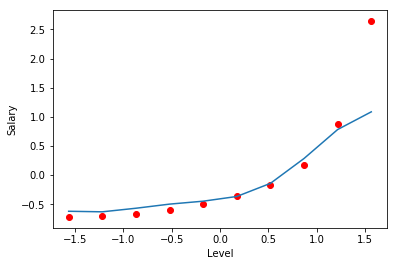

In [42]:
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X))
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

Note the scale in the graph has changed.

Furthermore, notice how the model doesnt reach the highest point - this is becauas SVR has built in methods that penalize outliers. The last point is considered an outlier. Below will will display the prediction in the salary for the 6.5 level.

In [46]:
y_pred = regressor.predict(sc_X.transform(np.array([[6.5]])))

Note how we need to transform our level to take into account the feature scaling. Also note that the transform method expects an array, and so we must convert the 6.5 into a matrix with a single entry.

In [52]:
y_pred #this is the scaled prediction of the salary. Thus we must invert the transformation now!

array([ 170370.0204065])

In [53]:
y_pred = sc_Y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))

In [54]:
y_pred

array([ 170370.0204065])

This concludes SVR!